<a href="https://colab.research.google.com/github/mgiorgi13/GNN_Notebooks/blob/main/Graph%20Basics%20and%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -r requirements.txt
# Import necessary libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Graph Creation

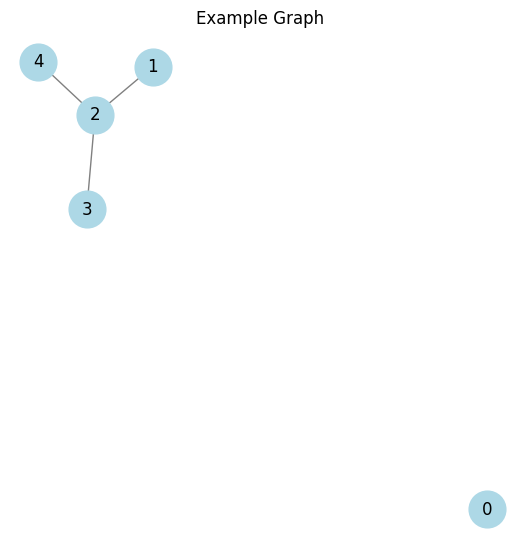

In [290]:
# Create a random graph
n = 5  # Number of nodes
p = 0.3  # Probability of edge creation
G = nx.erdos_renyi_graph(n, p)

# Plot the graph
def plot_graph(G, Title="Example Graph", edge_labels=None, color='lightblue'):
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=color, node_size=700, edge_color='gray')
    if edge_labels is not None:
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d.get(edge_labels, '')}" for u, v, d in G.edges(data=True)})
    plt.title(Title)
    plt.show()


# Visualization of the random graph
plot_graph(G)

## Directed Graphs

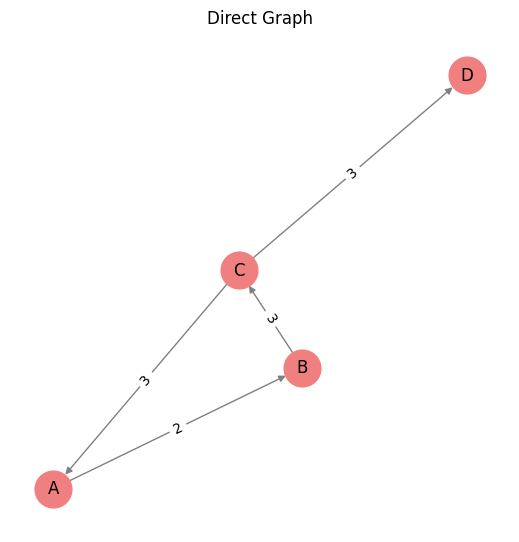

Neighbors of C: ['A', 'D']
Neighbors of C: ['B']


In [291]:
# Create an empty directed graph
Di = nx.DiGraph()

# Add nodes and edges
Di.add_node("A")
Di.add_nodes_from(["B", "C"])
Di.add_edge("A", "B", weight=2)
Di.add_edges_from([("B", "C"), ("C", "A"),("C", "D") ], weight=3)

# Remove a node and an edge (uncomment to try)
# Di.remove_node("C")
# # Di.remove_edge("B", "C") #unnecessary 

plot_graph(Di, Title="Direct Graph", edge_labels="weight", color='lightcoral')

# Neighbors of a node
print("Neighbors of C:", list(Di.successors("C")))
print("Neighbors of C:", list(Di.predecessors("C")))

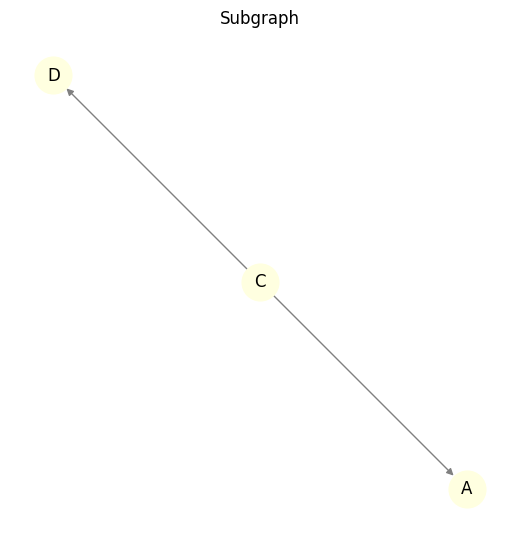

Subgraph isomorphic to G: True


In [292]:
# Subgraph
sub_nodes = ["A", "C", "D"]
subG = Di.subgraph(sub_nodes)
plot_graph(subG, Title="Subgraph", color='lightyellow')
# Graph isomorphism check (G vs subgraph)
from networkx.algorithms import isomorphism
GM = isomorphism.DiGraphMatcher(Di, subG)
print("Subgraph isomorphic to G:", GM.subgraph_is_isomorphic())

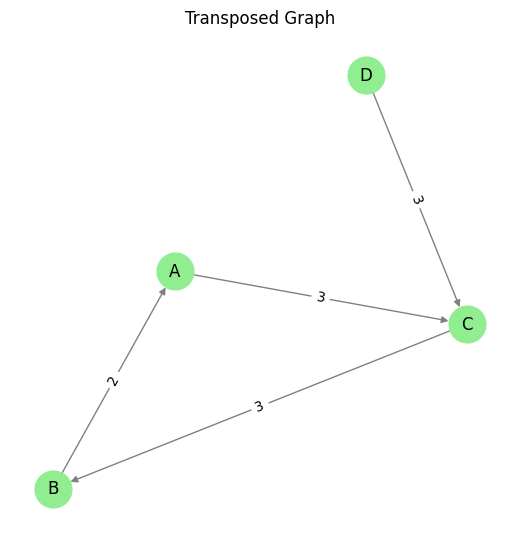

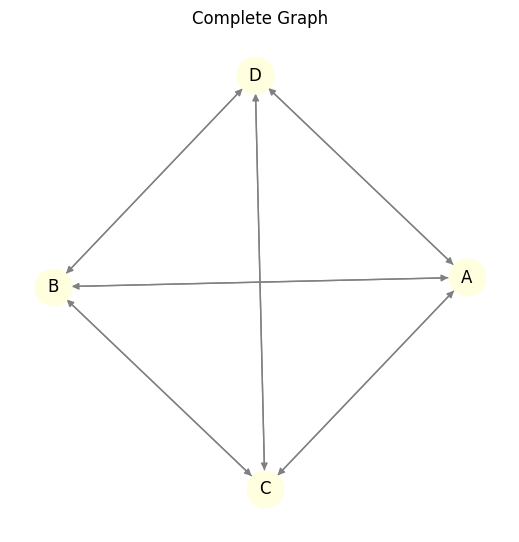

In [293]:
# Transpose graph
G_T = Di.reverse()
plot_graph(G_T, Title="Transposed Graph", edge_labels="weight", color='lightgreen')
# Make graph complete (directed)
G_complete = nx.complete_graph(Di.nodes, create_using=nx.DiGraph())
plot_graph(G_complete, Title="Complete Graph", edge_labels="weight", color='lightyellow')

In [294]:
# Compute degree matrix with weights
def compute_degree_matrix(G):
    # Create a degree matrix
    D = np.zeros((len(G.nodes()), len(G.nodes())))
    for i, node in enumerate(G.nodes()):
        D[i, i] = G.in_degree(node, weight='weight') - G.out_degree(node, weight='weight')
    return D
# Compute the degree matrix
degree_matrix = compute_degree_matrix(Di)
print("Degree Matrix of directed Graph:")
print(degree_matrix)

# Compute the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(Di).todense()
print("Adjacency Matrix of directed Graph:")
print(adjacency_matrix)

Degree Matrix of directed Graph:
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -3.  0.]
 [ 0.  0.  0.  3.]]
Adjacency Matrix of directed Graph:
[[0 2 0 0]
 [0 0 3 0]
 [3 0 0 3]
 [0 0 0 0]]


## Undirected Graph

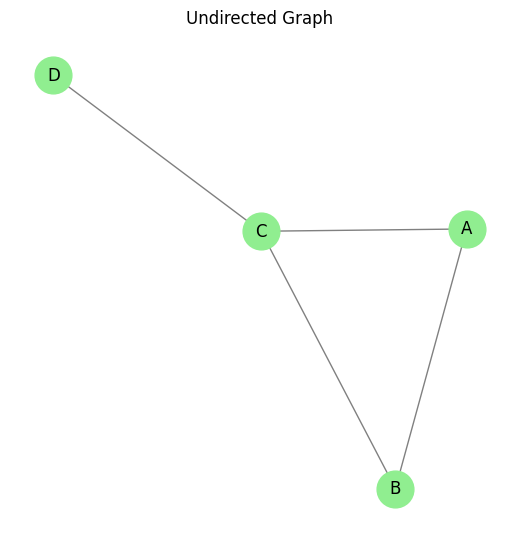

In [295]:
# convert digraph to undirected graph
G = Di.to_undirected()
# remove data from edges
for u, v, d in G.edges(data=True):
    G.edges[u, v]['weight'] = 1
plot_graph(G, Title="Undirected Graph", color='lightgreen')

In [296]:
# Compute incidence matrix
def incidence_matrix(G):
    # Create an incidence matrix
    edges = list(G.edges())
    n = len(G.nodes())
    m = len(edges)
    matrix = np.zeros((n, m))

    for j, (u, v) in enumerate(edges):
        matrix[list(G.nodes()).index(u), j] = 1
        matrix[list(G.nodes()).index(v), j] = -1

    return matrix
# Compute the incidence matrix
inc_matrix = incidence_matrix(G)
print("Incidence Matrix:") 
print(inc_matrix)

# Compute degree matrix
degree_values = [val for _, val in G.degree()]
degree_matrix = np.diag(degree_values)
print("Degree Matrix using nx:")
print(degree_matrix)    

# Compute the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adjacency_matrix)

# Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix:")
print(laplacian_matrix)

assert np.array_equal(laplacian_matrix, degree_matrix - adjacency_matrix), "Laplacian matrix is not equal to D - A"
assert np.array_equal(laplacian_matrix, inc_matrix @ inc_matrix.T), "Laplacian matrix is not equal to BBT"

Incidence Matrix:
[[ 1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [ 0. -1. -1.  1.]
 [ 0.  0.  0. -1.]]
Degree Matrix using nx:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 1]]
Adjacency Matrix:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]
Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2 -1  0]
 [-1 -1  3 -1]
 [ 0  0 -1  1]]


In [297]:
# Node list
print("Node list:", G.nodes(data=True))
# Edge list
print("Edge list:", list(G.edges(data=True)))

Node list: [('A', {}), ('B', {}), ('C', {}), ('D', {})]
Edge list: [('A', 'B', {'weight': 1}), ('A', 'C', {'weight': 1}), ('B', 'C', {'weight': 1}), ('C', 'D', {'weight': 1})]


## Properties 

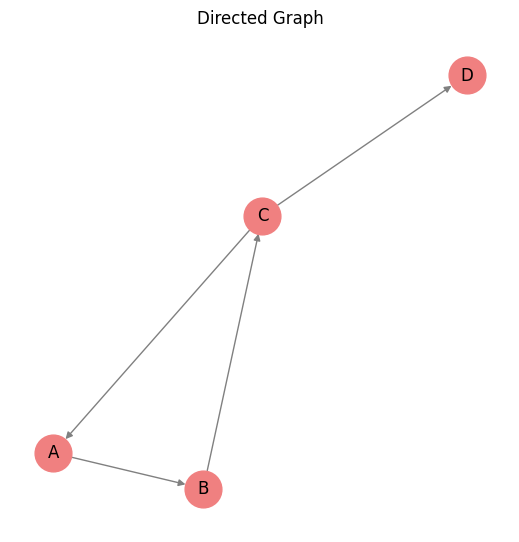

Cycles found (directed): [['A', 'B', 'C']]
Connected components: [{'D', 'A', 'B', 'C'}]
Is the directed graph strongly connected? False
Is the directed graph weakly connected? True
Strongly connected components: [{'D'}, {'A', 'B', 'C'}]
Weakly connected components: [{'D', 'A', 'B', 'C'}]
Is the graph a tree? False


In [298]:
# Directed graph
# Find cycles
plot_graph(Di, Title="Directed Graph", color='lightcoral')
cycles = list(nx.simple_cycles(Di))
print("Cycles found (directed):", cycles)
components = list(nx.connected_components(G))
print("Connected components:", components)
print("Is the directed graph strongly connected?", nx.is_strongly_connected(Di))
print("Is the directed graph weakly connected?", nx.is_weakly_connected(Di))

strong_components = list(nx.strongly_connected_components(Di))
print("Strongly connected components:", strong_components)
weak_components = list(nx.weakly_connected_components(Di))
print("Weakly connected components:", weak_components)
# Check if the graph is a tree
print("Is the graph a tree?", nx.is_tree(Di))

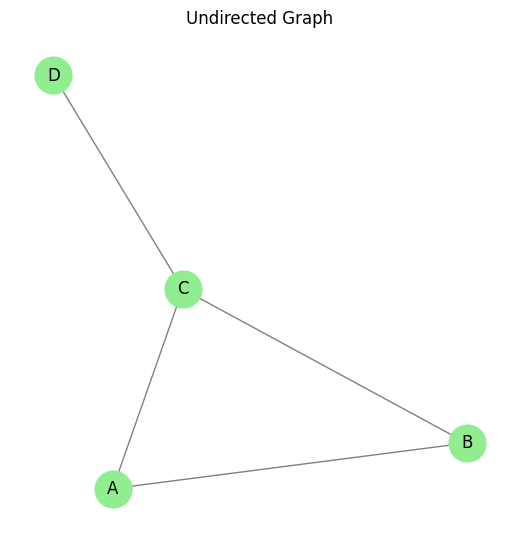

Degree centrality: {'A': 0.6666666666666666, 'B': 0.6666666666666666, 'C': 1.0, 'D': 0.3333333333333333}
Betweenness centrality: {'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.0}
Closeness centrality: {'A': 0.75, 'B': 0.75, 'C': 1.0, 'D': 0.6}


In [299]:
# Undirected graph
plot_graph(G, Title="Undirected Graph", color='lightgreen')
# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

print("Degree centrality:", degree_centrality)
print("Betweenness centrality:", betweenness)
print("Closeness centrality:", closeness)


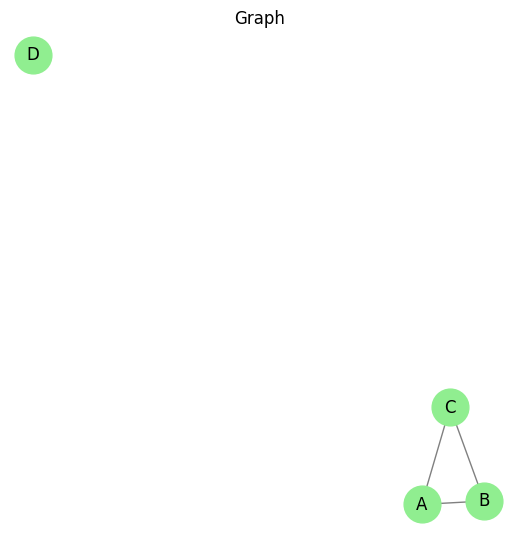

Is the graph connected? False
Is the graph bipartite? False
Does the graph have cycles? True
Cycles found: [['B', 'C', 'A']]


In [300]:
# Drop edge C-D if it exists
if G.has_edge("C", "D"):
    G.remove_edge("C", "D")
    
plot_graph(G, Title="Graph", color='lightgreen')
# Check if the graph is connected
print("Is the graph connected?", nx.is_connected(G))
# Check if the graph is bipartite
print("Is the graph bipartite?", nx.is_bipartite(G))
if nx.is_bipartite(G):
    sets = nx.bipartite.sets(G)
    print("Bipartite sets:", sets)
# Check if the graph has cycles
cycles = list(nx.cycle_basis(G))

# If list is empty, there are no cycles
has_cycles = len(cycles) > 0
print("Does the graph have cycles?", has_cycles)
print("Cycles found:", cycles)

In [301]:
# Check adjacency
print("A and B are adjacent:", G.has_edge("A", "B"))
# Degree info
print("Degree of C:", G.degree("C"))
# Get neighbors
print("Neighbors of C:", list(G.neighbors("C")))

A and B are adjacent: True
Degree of C: 2
Neighbors of C: ['B', 'A']


## Algorithms

In [302]:
# Minimum Spanning Tree (on undirected)
mst = nx.minimum_spanning_tree(Di.to_undirected())
print("MST edges:", list(mst.edges()))

MST edges: [('A', 'B'), ('A', 'C'), ('C', 'D')]


In [303]:
# Shortest Path Algorithm (Dijkstra)
shortest_paths = nx.shortest_path_length(Di, source="A",weight='weight')
print("Shortest distances from node 0:", dict(shortest_paths))

Shortest distances from node 0: {'A': 0, 'B': 2, 'C': 5, 'D': 8}


In [304]:
# Bellman-Ford Algorithm (for shortest paths with negative weights)
bellman_ford_paths = nx.single_source_bellman_ford_path_length(Di, source="A", weight='weight')
print("Shortest distances with Bellman-Ford:", bellman_ford_paths)

Shortest distances with Bellman-Ford: {'A': 0, 'B': 2, 'C': 5, 'D': 8}


In [305]:
# Define a heuristic function: h(n)
def heuristic(u, v):
    # Dummy heuristic: straight-line distance (if you had coordinates)
    # Here we just return 0 for Dijkstra-like behavior
    return 0

# Compute shortest path using A*
path = nx.astar_path(Di, source='A', target='D', heuristic=heuristic, weight='weight')
print("A* path:", path)

# Optionally: total cost of path
cost = nx.astar_path_length(Di, source='A', target='D', heuristic=heuristic, weight='weight')
print("Total cost:", cost)

A* path: ['A', 'B', 'C', 'D']
Total cost: 8


In [306]:
# PageRank Algorithm
pagerank = nx.pagerank(Di)
print("PageRank:", pagerank)

PageRank: {'A': 0.2137621842472386, 'B': 0.26462302680270133, 'C': 0.3078526047028215, 'D': 0.2137621842472386}


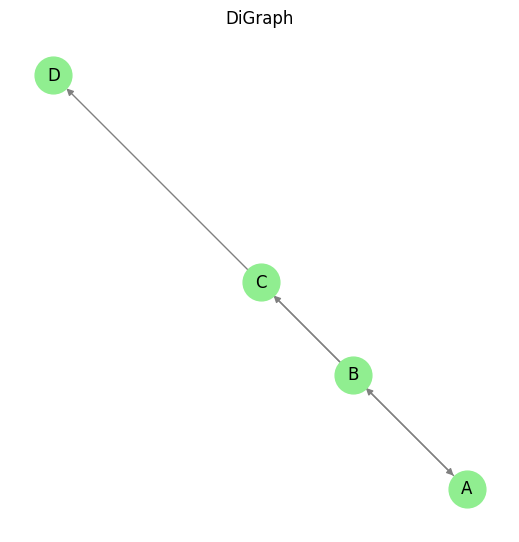

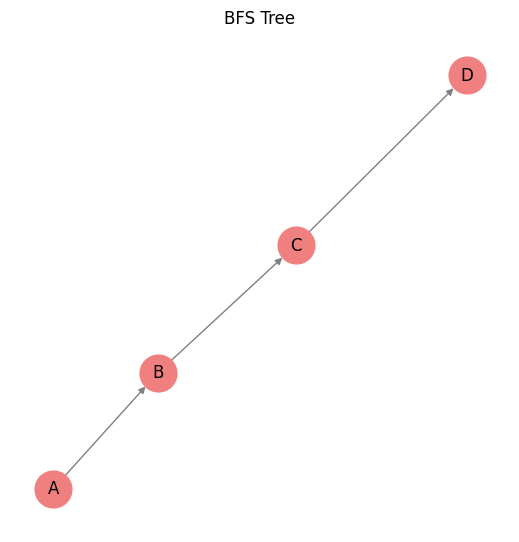

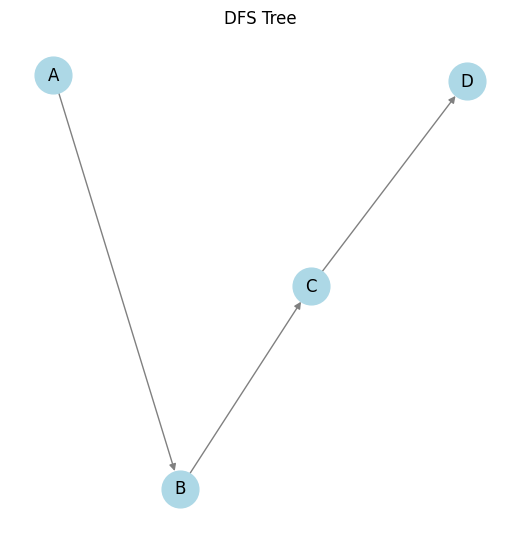

In [307]:
# Graph Search - BFS and DFS
bfs_tree = nx.bfs_tree(Di, source="A")
dfs_tree = nx.dfs_tree(Di, source="A")

plot_graph(Di, Title="DiGraph", color='lightgreen')
plot_graph(bfs_tree, Title="BFS Tree", color='lightcoral')
plot_graph(dfs_tree, Title="DFS Tree", color='lightblue')